Importing Modules

In [1458]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pickle

In [1459]:
parkinson_dataset=pd.read_csv("C:/Users/HP/Desktop/PDO1/Dataset/parkinsons.csv")

In [1460]:
parkinson_dataset.head()

,name,MDVP_Fo_Hz,MDVP_Fhi_Hz,MDVP_Flo_Hz,MDVP_Jitter_percent,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,...,Shimmer_DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [1461]:
parkinson_dataset.shape

(195, 24)

In [1462]:
parkinson_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 195 non-null    object 
 1   MDVP_Fo_Hz           195 non-null    float64
 2   MDVP_Fhi_Hz          195 non-null    float64
 3   MDVP_Flo_Hz          195 non-null    float64
 4   MDVP_Jitter_percent  195 non-null    float64
 5   MDVP_Jitter_Abs      195 non-null    float64
 6   MDVP_RAP             195 non-null    float64
 7   MDVP_PPQ             195 non-null    float64
 8   Jitter_DDP           195 non-null    float64
 9   MDVP_Shimmer         195 non-null    float64
 10  MDVP_Shimmer_dB      195 non-null    float64
 11  Shimmer_APQ3         195 non-null    float64
 12  Shimmer_APQ5         195 non-null    float64
 13  MDVP_APQ             195 non-null    float64
 14  Shimmer_DDA          195 non-null    float64
 15  NHR                  195 non-null    flo

In [1463]:
parkinson_dataset.describe()

,MDVP_Fo_Hz,MDVP_Fhi_Hz,MDVP_Flo_Hz,MDVP_Jitter_percent,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,MDVP_Shimmer_dB,...,Shimmer_DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [1464]:
parkinson_dataset.isnull().sum()

name                   0
MDVP_Fo_Hz             0
MDVP_Fhi_Hz            0
MDVP_Flo_Hz            0
MDVP_Jitter_percent    0
MDVP_Jitter_Abs        0
MDVP_RAP               0
MDVP_PPQ               0
Jitter_DDP             0
MDVP_Shimmer           0
MDVP_Shimmer_dB        0
Shimmer_APQ3           0
Shimmer_APQ5           0
MDVP_APQ               0
Shimmer_DDA            0
NHR                    0
HNR                    0
status                 0
RPDE                   0
DFA                    0
spread1                0
spread2                0
D2                     0
PPE                    0
dtype: int64

In [1465]:
parkinson_dataset['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [1466]:
parkinson_dataset.drop(columns=['name']).groupby('status').mean()


,MDVP_Fo_Hz,MDVP_Fhi_Hz,MDVP_Flo_Hz,MDVP_Jitter_percent,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,MDVP_Shimmer_dB,...,MDVP_APQ,Shimmer_DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


Data Pre-Processing

In [1467]:
X=parkinson_dataset.drop(columns=['status','name'],axis=1)
Y=parkinson_dataset['status']

In [1468]:
print(X)

     MDVP_Fo_Hz  MDVP_Fhi_Hz  MDVP_Flo_Hz  MDVP_Jitter_percent  \
0       119.992      157.302       74.997              0.00784   
1       122.400      148.650      113.819              0.00968   
2       116.682      131.111      111.555              0.01050   
3       116.676      137.871      111.366              0.00997   
4       116.014      141.781      110.655              0.01284   
..          ...          ...          ...                  ...   
190     174.188      230.978       94.261              0.00459   
191     209.516      253.017       89.488              0.00564   
192     174.688      240.005       74.287              0.01360   
193     198.764      396.961       74.904              0.00740   
194     214.289      260.277       77.973              0.00567   

     MDVP_Jitter_Abs  MDVP_RAP  MDVP_PPQ  Jitter_DDP  MDVP_Shimmer  \
0            0.00007   0.00370   0.00554     0.01109       0.04374   
1            0.00008   0.00465   0.00696     0.01394       0.06134 

In [1469]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


Train_Test_Split

In [1470]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [1471]:
print(X.shape,X_train.shape,X_test.shape)

(195, 22) (156, 22) (39, 22)


Data Standardization

In [1472]:
scaler=StandardScaler()

In [1473]:
scaler.fit(X_train)

StandardScaler()

In [1474]:
X_train=scaler.transform(X_train)

In [1475]:
X_test=scaler.transform(X_test)

In [1476]:
print(X_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


Balancing the Model


In [1477]:




smote = SMOTE(random_state=42)
X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, Y_train)


unique, counts = np.unique(Y_train_balanced, return_counts=True)
print(dict(zip(unique, counts)))  


{np.int64(0): np.int64(116), np.int64(1): np.int64(116)}


In [1478]:

smote1=SMOTE(random_state=42)


X_test_balanced,Y_test_balanced=smote1.fit_resample(X_test,Y_test)
unique,counts=np.unique(Y_test_balanced, return_counts=True)
print(dict(zip(unique, counts)))  



{np.int64(0): np.int64(31), np.int64(1): np.int64(31)}


Model Training

Support Vector Machine Model

In [1479]:
model=svm.SVC(kernel="rbf",C=1.0,gamma=0.05,class_weight="balanced",probability=True)

In [1480]:
model.fit(X_train_balanced,Y_train_balanced)

SVC(class_weight='balanced', gamma=0.05, probability=True)

In [1481]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train_balanced, Y_train_balanced, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())


Cross-validation scores: [0.82978723 0.95744681 1.         0.95652174 0.86956522]
Mean cross-validation score: 0.9226641998149863


Model Evaluation

Accuracy Score

In [1482]:
X_train_predict=model.predict(X_train_balanced)
accuracy_score(Y_train_balanced,X_train_predict)

0.9568965517241379

In [1483]:
X_test_predict=model.predict(X_test_balanced)
accuracy_score(Y_test_balanced,X_test_predict)

0.8870967741935484

In [1484]:
classification_report(Y_test_balanced,X_test_predict)

'              precision    recall  f1-score   support\n\n           0       0.82      1.00      0.90        31\n           1       1.00      0.77      0.87        31\n\n    accuracy                           0.89        62\n   macro avg       0.91      0.89      0.89        62\nweighted avg       0.91      0.89      0.89        62\n'

In [1485]:
cm=confusion_matrix(Y_test_balanced,X_test_predict)
print(cm)

[[31  0]
 [ 7 24]]


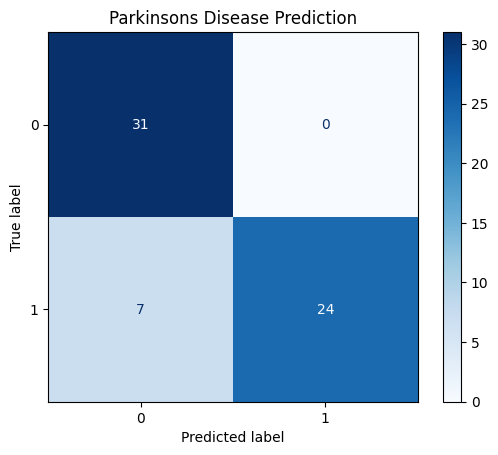

In [1486]:
cmd=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["0","1"])
cmd.plot(cmap="Blues")
plt.title("Parkinsons Disease Prediction")
plt.show()

In [1487]:



feature_names = ["MDVP_Fo_Hz", "MDVP_Fhi_Hz", "MDVP_Flo_Hz", "MDVP_Jitter_percent", "MDVP_Jitter_Abs",
                 "MDVP_RAP", "MDVP_PPQ", "Jitter_DDP", "MDVP_Shimmer", "MDVP_Shimmer_dB", "Shimmer_APQ3",
                 "Shimmer_APQ5", "MDVP_APQ", "Shimmer_DDA", "NHR", "HNR", "RPDE", "DFA", "spread1",
                "spread2", "D2", "PPE"]



input_data=[214.28900,260.27700,77.97300,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,0.19000,0.01026,0.01161,0.01373,0.03078,0.04398,21.20900,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569]


input_data_as_df = pd.DataFrame([input_data], columns=feature_names)


input_data_as_numpy_array = np.asarray(input_data)


input_data_reshape = input_data_as_numpy_array.reshape(1, -1)



std_data = scaler.transform(input_data_reshape)


predict = model.predict(std_data)


if predict[0] == 1:
    print("The Person has Parkinson's disease")
else:
    print("The Person does not have Parkinson's disease")


The Person does not have Parkinson's disease


c:\Users\HP\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1488]:
filename='parkinson_model.sav'
pickle.dump(model,open(filename,'wb'))
parkinson_model=pickle.load(open('parkinson_model.sav','rb'))

In [1489]:
scaler_filename='scaler2.sav'
pickle.dump(scaler,open(scaler_filename,'wb'))
scaler_parkinson = pickle.load(open("scaler2.sav", 'rb'))

 

